In [1]:
import tsplib95 
import networkx as nx
import numpy as np
np.random.seed(42)

problem = tsplib95.load("ca4663_mini.tsp")
nodes = problem.node_coords

In [58]:
problem.as_name_dict().keys()

dict_keys(['name', 'comment', 'type', 'dimension', 'edge_weight_type', 'node_coords'])

In [51]:
np.random.seed(42)
class TSPSolver:
    def solve(self,nodes):
        self.nodes = nodes
        initial_solution = self.initial_solution()
        best_solution = self.local_search(initial_solution)

    def initial_solution(self):
        n = len(self.nodes)
        path = np.random.permutation(np.arange(1,n+1,1)) 

        cost = self.cost(path)
        solution = {"path":path} | cost
        return solution

    def local_search(self, current_solution):
        self.simulated_annealing(current_solution)

    def simulated_annealing(self, current_solution):
        current_path = current_solution["path"]
        current_eval = current_solution["total_cost"]
        initial_eval = current_eval
        cooling_rate = 1
        max_non_improov = 1_000
        max_iterations = 80_000
        temperature = 50_000

        n = len(current_path)
        iteration = 0
        non_improov = 0

        while non_improov < max_non_improov and temperature > 1 and iteration < max_iterations:
            iteration += 1
            i,j = np.random.choice(range(1,n-1),size=2,replace=False)
            bounds = (i,j) if i<j else (j,i)
            swap_cost = self.swap_cost(current_path,bounds)

            # print(self.check_eval(current_eval,current_path, swap_cost))
            if swap_cost < 0:
                non_improov = 0
                current_path = self.swap_n_reverse(current_path, bounds)
                current_eval += swap_cost
            else:
                non_improov += 1
                accepting_prob = np.exp(-swap_cost/temperature)
                if np.random.uniform() < accepting_prob:
                    current_path = self.swap_n_reverse(current_path, bounds)
                    current_eval += swap_cost
                
                temperature -= cooling_rate

        self.current_path = current_path
        print(f"iteration: {iteration}, Non-improvments: {non_improov}, temperature: {temperature}")
        print(f"initial cost:{initial_eval}; current cost: {current_eval}; {current_eval/initial_eval}") #% \n ({i,j})")
        return {"path": current_path, "cost": current_eval}

    def node_distance(self,a,b):
        distance = self.distance(self.nodes[a], self.nodes[b])
        return distance

    def distance(self, a, b):
        #todo: check performance
        return np.sqrt(
        (a[0] - b[0])**2 + (a[1] - b[1])**2
        )

        
    def swap_n_reverse(self, path, bounds):
        new_path = np.copy(path)
        i,j = bounds
        new_path[i:j] = new_path[i:j][::-1]

        return new_path


    def check_eval(self, current_eval,current_path, swap_cost, bounds):
        calculated_cost = self.cost(current_path)["total_cost"]
        diff = calculated_cost - current_eval + 0.0000001
        print(f"i,j: {bounds}")
        print(f"\n swap/diff: {swap_cost/diff} \n eval: {current_eval}; calculated: {calculated_cost}; diff: {diff} diff% {current_eval/calculated_cost}")

        return ((calculated_cost - current_eval)**2)**0.5 < 100


    def swap_cost(self, path, bounds):
        i,j = bounds
        n1,n2 = path[i-1], path[i]
        n3,n4 = path[j-1], path[j]

        d = self.node_distance
        cost = - ((d(n1,n2) - d(n1,n3)) + (d(n3,n4) - d(n2,n4)))

        return cost
            
  
    def cost(self, path):
        n = len(path)
        cost = np.array([self.distance(self.nodes[path[i]],self.nodes[path[i+1]]) for i in range(n-1)])
        total_cost = sum(cost)

        return {"cost":cost, "total_cost":total_cost}


In [52]:
np.random.seed(42)
dic = {k:v for k,v in list(nodes.items())[:10]}
solver = TSPSolver()
# solver.swap_n_reverse(a)
# solver.solve(dic)
# solver.solve(nodes)
# d_l = list(dic.keys())
# solver.swap_n_reverse(d_l,(1,8))
# solver.nodes = dic
# solver.swap_cost(list(dic.keys()),[2,3])
path = solver.solve(dic)


iteration: 79430, Non-improvments: 33, temperature: 1
initial cost:2144.429532506977; current cost: 1771.1954982493771; 0.825951830731754


In [910]:
np.exp(-10/3000)

0.9966722160545233

In [935]:
# node = (1,0)
# edges = problem.get_edges()
# node = next(edges)
# while node[0] == 1:
#     node = next(edges)
#     print(node)
#All the nodes are connected
# d_l
# aa = [1,2,3,4,5]
# aa[2:4]
# np.array(aa)[2:4]

array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array_s = [ 1,  2,  6,  5,  4,  3,  7,  8,  9, 10]

true_diff = solver.cost(array)["total_cost"] - solver.cost(array_s)["total_cost"]
swap_cost = solver.swap_cost(array_s,(2,5)) 
# print(swap_cost, true_diff, swap_cost / true_diff, (solver.swap_n_reverse(array,(2,6)) == array_s).all())

# solver.cost(array)["total_cost"] - swap_cost
swap_cost
# a_s2 = solver.swap_n_reverse(array_s,(2,5))
# solver.cost(a_s2)["total_cost"]

295.7721240547329

In [434]:
p1 = (1,1)
p2 = (2,2)
p3 = (3,3)
p4 = (4,4)
p5 = (5,5)
e1 = (p1,p2)
e2 = (p2,p3)
e3 = (p3, p4)
e4 = (p4, p5)
d = solver.distance
original = solver.distance(p1, p2) + solver.distance(p2, p3) + solver.distance(p3, p4) + solver.distance(p4, p5)
changed = solver.distance(p1, p4) + solver.distance(p4, p3) + solver.distance(p3, p2) + solver.distance(p2, p5)
diff = (d(p1,p2) - d(p1,p4)) + (d(p4,p5)-d(p2,p5))

print(original, changed, diff, original - changed, original - diff)

5.656854249492381 11.31370849898476 -5.65685424949238 -5.656854249492379 11.31370849898476


In [36]:
d = {"a":1, "b":2}
d.pop("a")
d

{'b': 2}

In [715]:
solver = TSPSolver()
solver.solve(nodes)

old: 3947.233677818809 cost: 3947.2336778188087;

 swap/diff: -0.762032254764082 
 eval: 47851477.10356175; calculated: 47846297.22613108; diff: -5179.8774305699635 diff% 1.0001082607794327
False
initial cost:47847529.86988393; current cost: 47851477.10356175; 1.0000824960805408% 
 ((3117, 3238))


In [21]:
G = problem.get_graph()
G

In [ ]:
nx.read

In [19]:
import matplotlib.pyplot as plt

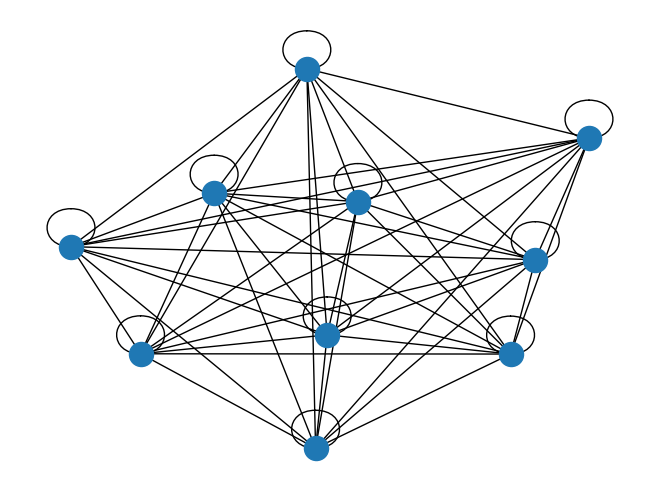

In [22]:
# nx.draw(G)

nx.draw(G)
plt.show()  

In [7]:
G = nx.petersen_graph()

subax1 = plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

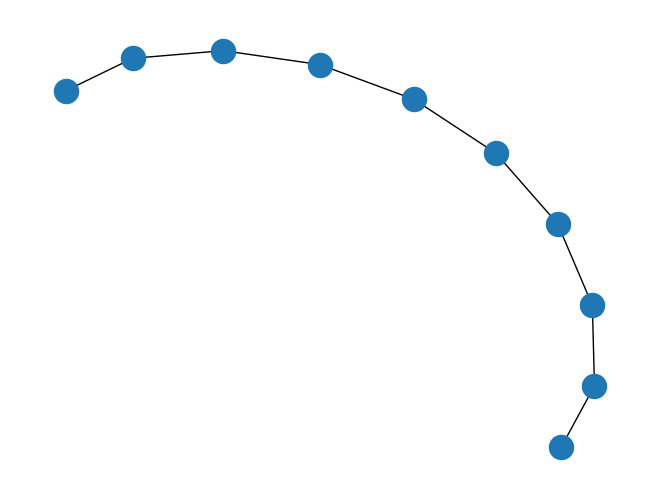

In [57]:
G=nx.Graph(name="buba")
G.add_nodes_from(nodes)
G.add_edges_from(zip(path,path[1:]))
nx.draw(G)
plt.show()

In [56]:
path = solver.current_path
zip(path,path[1:])